<a href="https://colab.research.google.com/github/JayedTamim/News-Article-Share-Prediction/blob/main/C191113_FL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   article_id                  1003 non-null   int64         
 1   title                       1003 non-null   object        
 2   text                        1003 non-null   object        
 3   published_date              1003 non-null   datetime64[ns]
 4   unique_tokens_rate          1003 non-null   float64       
 5   num_hrefs                   1003 non-null   int64         
 6   num_imgs                    1003 non-null   int64         
 7   num_videos                  1003 non-null   int64         
 8   average_token_length        1003 non-null   float64       
 9   num_keywords                1003 non-null   int64         
 10  data_channel                1003 non-null   object        
 11  min_avg_key                 1003 non-null   float64     

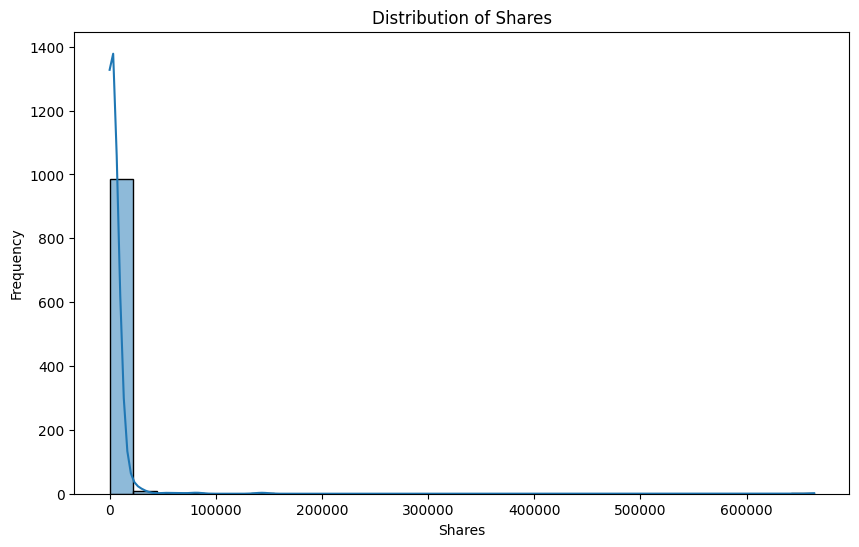

<ipython-input-13-4eb31917cd64>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


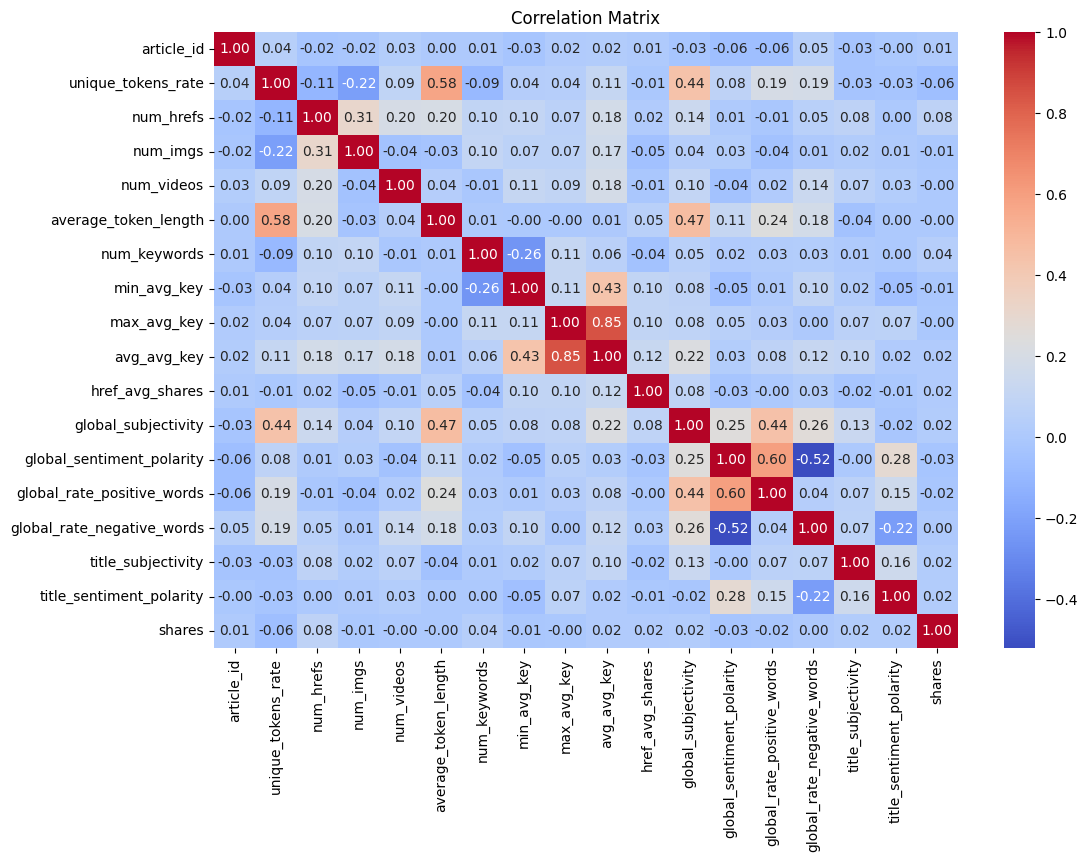

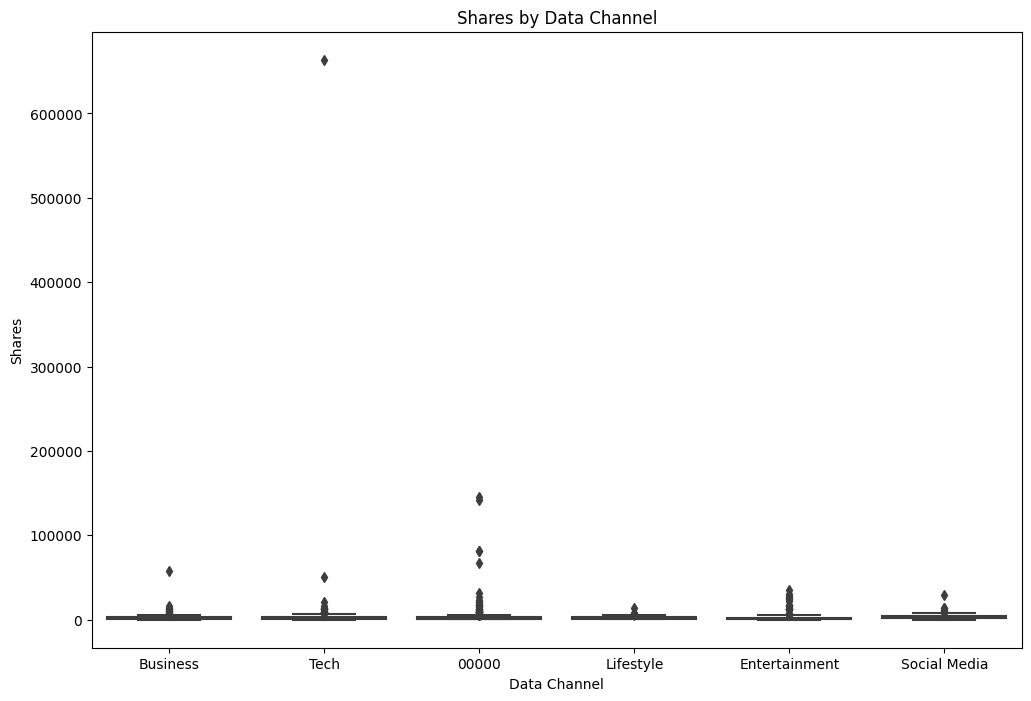

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from Excel
data = pd.read_excel("news_share_data.xlsx")

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Explore basic statistics of numerical variables
print(data.describe())

# Visualize the distribution of the target variable 'shares'
plt.figure(figsize=(10, 6))
sns.histplot(data['shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

# Explore correlations between numerical features and the target variable
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualize relationships between categorical features and the target variable
plt.figure(figsize=(12, 8))
sns.boxplot(x='data_channel', y='shares', data=data)
plt.title('Shares by Data Channel')
plt.xlabel('Data Channel')
plt.ylabel('Shares')
plt.show()







**Make inferences and find actionable insights from the data**


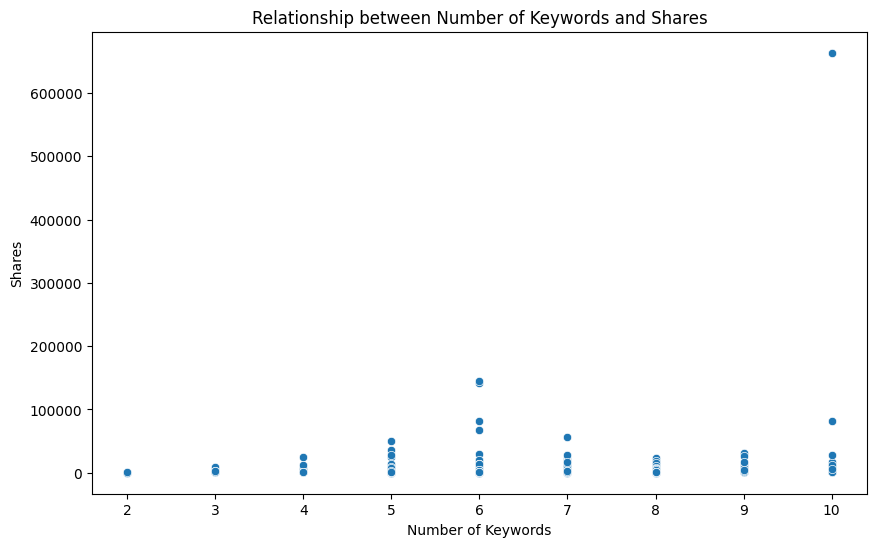

Average shares for links in the article: 13518.30


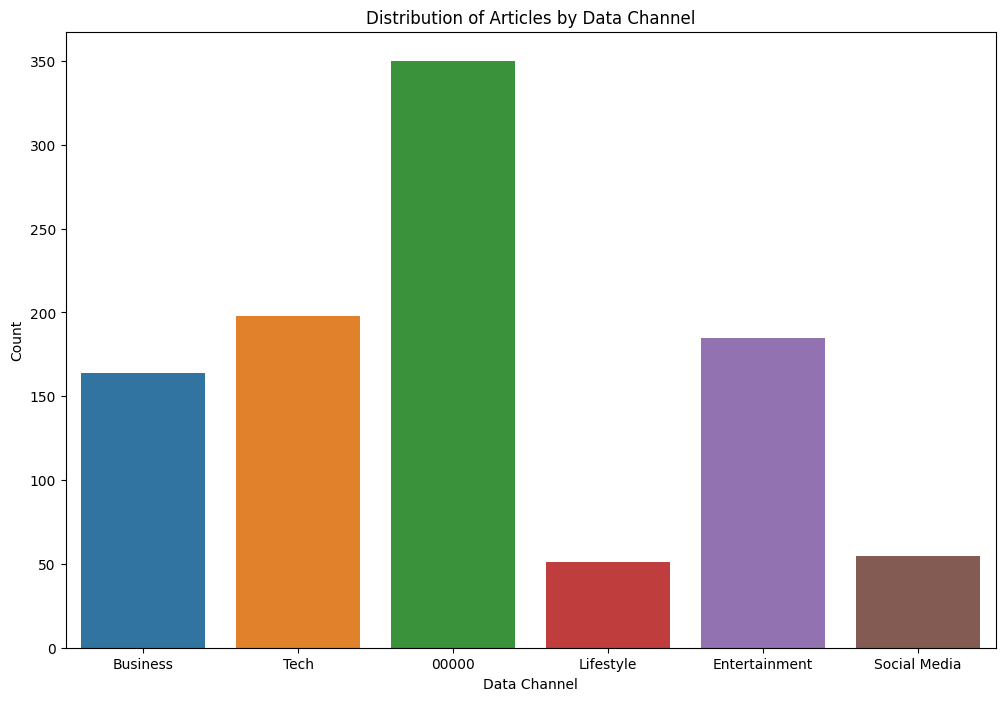

Average sentiment polarity in titles: 0.06


In [ ]:

# Inference 1: Relationship between 'num_keywords' and 'shares'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_keywords', y='shares', data=data)
plt.title('Relationship between Number of Keywords and Shares')
plt.xlabel('Number of Keywords')
plt.ylabel('Shares')
plt.show()

# Inference 2: Average shares for links in the article
avg_shares_for_links = data['href_avg_shares'].mean()
print(f"Average shares for links in the article: {avg_shares_for_links:.2f}")

# Inference 3: Data channel distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='data_channel', data=data)
plt.title('Distribution of Articles by Data Channel')
plt.xlabel('Data Channel')
plt.ylabel('Count')
plt.show()

# Inference 4: Average sentiment polarity in titles
avg_sentiment_polarity_title = data['title_sentiment_polarity'].mean()
print(f"Average sentiment polarity in titles: {avg_sentiment_polarity_title:.2f}")




**Feature Engineering(weekday, is weekend, number of tokens in title,
content etc)**

   article_id                                              title  \
0     7014291                 It's Time for a YouTube Competitor   
1     7014327  The Ultimate Roundup of 2014's Biggest April F...   
2     7014304  A Selfie and One Garish Jacket: How the Red So...   
3     7031995    African Telecom Proposes More Diverse Emoticons   
4     6541359  Google to Launch Improved Android Camera App, ...   

                                                text published_date  \
0  It was reported last week that Yahoo is gettin...     2014-03-31   
1  April Fools' marks the day when pranking goes ...     2014-04-01   
2  The 2013 World Series champion Boston Red Sox ...     2014-04-01   
3  Less than a week after Apple pledged to make i...     2014-04-01   
4  Android users may soon see a series of new fea...     2014-04-01   

   unique_tokens_rate  num_hrefs  num_imgs  num_videos  average_token_length  \
0            0.640816          5         3           1              4.579592   
1   

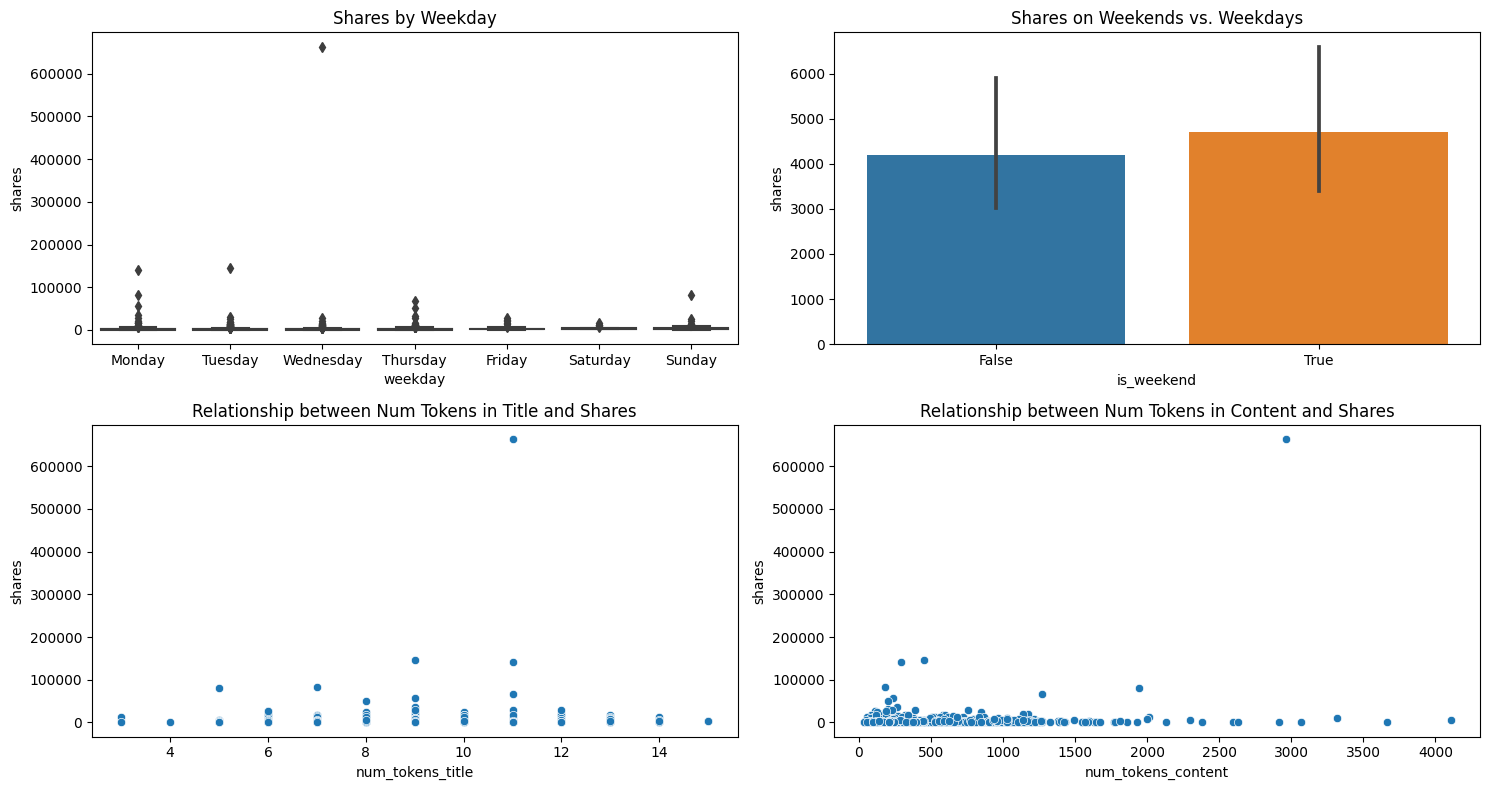

In [ ]:


# Feature 1: Extract weekday from the 'published_date'
data['published_date'] = pd.to_datetime(data['published_date'])
data['weekday'] = data['published_date'].dt.day_name()

# Feature 2: Create binary feature 'is_weekend'
data['is_weekend'] = data['published_date'].dt.dayofweek // 5 == 1

# Feature 3: Number of tokens in the title
data['num_tokens_title'] = data['title'].apply(lambda x: len(str(x).split()))

# Feature 4: Number of tokens in the content
data['num_tokens_content'] = data['text'].apply(lambda x: len(str(x).split()))

# Display the modified dataset
print(data.head())

# Visualize the distribution of the new features
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='weekday', y='shares', data=data)
plt.title('Shares by Weekday')

plt.subplot(2, 2, 2)
sns.barplot(x='is_weekend', y='shares', data=data)
plt.title('Shares on Weekends vs. Weekdays')

plt.subplot(2, 2, 3)
sns.scatterplot(x='num_tokens_title', y='shares', data=data)
plt.title('Relationship between Num Tokens in Title and Shares')

plt.subplot(2, 2, 4)
sns.scatterplot(x='num_tokens_content', y='shares', data=data)
plt.title('Relationship between Num Tokens in Content and Shares')

plt.tight_layout()
plt.show()




**Make model ready data(data preprocessing)**

In [ ]:

# Handling Missing Values
# Check for missing values again
print("Missing Values:")
print(data.isnull().sum())

# If there are missing values, handle them based on your insights (e.g., imputation)
# Example: Impute missing values in numerical columns with the mean
data.fillna(data.mean(), inplace=True)

# Split the data into features (X) and the target variable (y)
X = data.drop(['shares', 'published_date'], axis=1)  # Exclude 'shares' and 'published_date'
y = data['shares']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features if necessary
from sklearn.preprocessing import StandardScaler
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Display the preprocessed data
print("Preprocessed Data:")
print(X_train.head())




Missing Values:
article_id                    0
title                         0
text                          0
published_date                0
unique_tokens_rate            0
num_hrefs                     0
num_imgs                      0
num_videos                    0
average_token_length          0
num_keywords                  0
data_channel                  0
min_avg_key                   0
max_avg_key                   0
avg_avg_key                   0
href_avg_shares               0
global_subjectivity           0
global_sentiment_polarity     0
global_rate_positive_words    0
global_rate_negative_words    0
title_subjectivity            0
title_sentiment_polarity      0
shares                        0
weekday                       0
is_weekend                    0
num_tokens_title              0
num_tokens_content            0
dtype: int64


<ipython-input-16-b4a909895844>:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)
<ipython-input-16-b4a909895844>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


Preprocessed Data:
     article_id                                              title  \
78     0.257559              Why Amazon Is Releasing a Set-Top Box   
29    -0.246991  You Know Nothing, 'Game of Thrones' Fan -- So ...   
280    0.251306  Silicon Valley Is Super Obsessed With HBO's 'S...   
507    0.247207  7 Quotes That Tell You Everything About the Co...   
638    0.242935  Amazon Appstore Hits 200,000 Apps, Almost Trip...   

                                                  text  unique_tokens_rate  \
78   Apple TV's pointer makes it frustrating to use...            1.004373   
29   A new interactive Game of Thrones guide from H...           -0.328599   
280  Let's face it, there's nothing quite so fascin...            1.723823   
507  Two men who stand to gain millions from the pr...           -0.358327   
638  Amazon's Appstore almost tripled in size in th...           -0.760356   

     num_hrefs  num_imgs  num_videos  average_token_length  num_keywords  \
78   -0.074199 

**Build Regression models to predict shares for the news article**

In [ ]:

# Exclude text-based columns and one-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train.drop(['title', 'text'], axis=1), columns=['weekday', 'data_channel'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test.drop(['title', 'text'], axis=1), columns=['weekday', 'data_channel'], drop_first=True)

# Initialize regression models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Train the models
linear_reg_model.fit(X_train_encoded, y_train)
decision_tree_model.fit(X_train_encoded, y_train)
random_forest_model.fit(X_train_encoded, y_train)

# Predictions on the training set
y_train_pred_linear = linear_reg_model.predict(X_train_encoded)
y_train_pred_tree = decision_tree_model.predict(X_train_encoded)
y_train_pred_forest = random_forest_model.predict(X_train_encoded)

# Predictions on the testing set
y_test_pred_linear = linear_reg_model.predict(X_test_encoded)
y_test_pred_tree = decision_tree_model.predict(X_test_encoded)
y_test_pred_forest = random_forest_model.predict(X_test_encoded)





In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assume 'X' contains features and 'y' contains the target variable 'shares'
# Modify this based on your actual feature columns
X = data.drop(columns=['shares', 'title', 'published_date', 'data_channel', 'text'])  # Exclude non-numeric columns
y = data['shares']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (if needed)
numeric_columns = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Train multiple regression models
linear_reg_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Train models
linear_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing set
linear_reg_pred = linear_reg_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)

# Evaluate models using Mean Squared Error (MSE)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)

# Print MSE for each model
print(f"Linear Regression MSE: {linear_reg_mse}")
print(f"Decision Tree MSE: {decision_tree_mse}")
print(f"Random Forest MSE: {random_forest_mse}")

# Choose the model with the lowest MSE
best_model = min(linear_reg_mse, decision_tree_mse, random_forest_mse)

# Consider ensemble methods or model stacking for further improvement if needed
